In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
def extract_score(tensor_str):
    match = re.search(r"tensor\(\[(.*?)\]\)", tensor_str)
    if match:
        return float(match.group(1))
    else:
        return None
df=pd.read_csv("Finalverification_scores.csv")
# Apply the function to the 'score' column
df['score'] = df['score'].astype(str).apply(extract_score)
df.head()

,file1,file2,score,user_relation
0,1.wav,2.wav,0.7356,same
1,1.wav,3.wav,0.5787,same
2,1.wav,4.wav,0.6272,same
3,1.wav,5.wav,0.6458,same
4,1.wav,6.wav,0.3905,different



--- Basic Statistics ---
                 count      mean       std     min       25%      50%  \
user_relation                                                           
different      19500.0  0.219804  0.113136 -0.1541  0.141600  0.20825   
same             400.0  0.702847  0.120709  0.0208  0.650775  0.71400   

                    75%     max  
user_relation                    
different      0.286100  0.6938  
same           0.781875  0.8955  


C:\Users\ITinframanage\AppData\Local\Temp\ipykernel_6024\1546178341.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='User Relation')


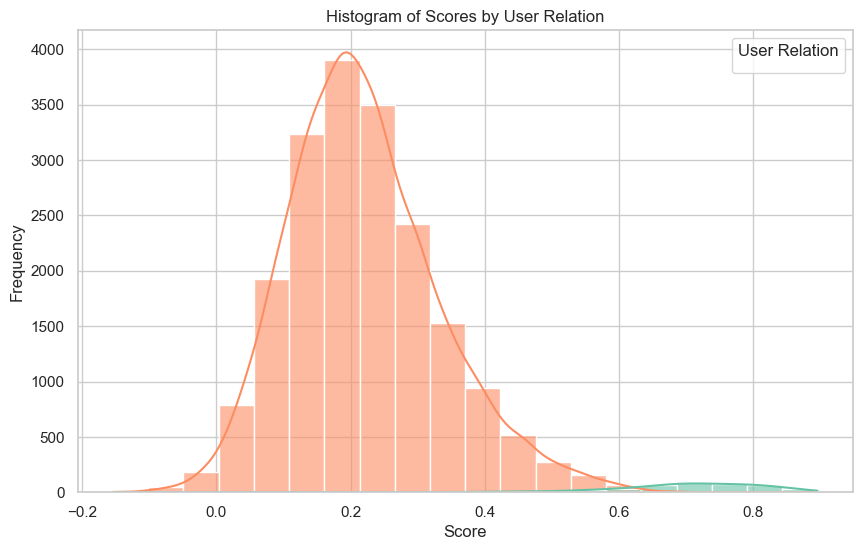

C:\Users\ITinframanage\AppData\Local\Temp\ipykernel_6024\1546178341.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='user_relation', y='score', palette='Set3')


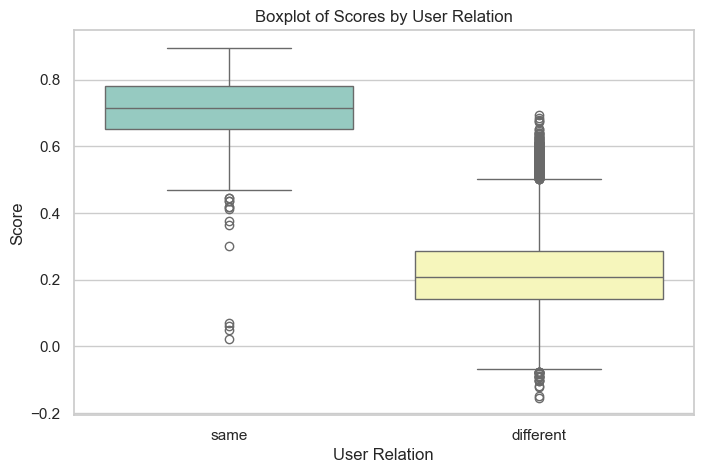

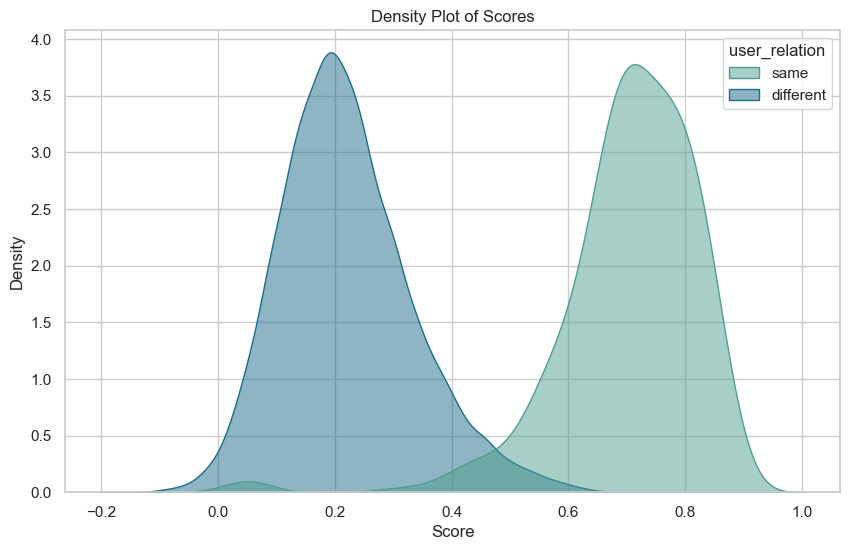

C:\Users\ITinframanage\AppData\Local\Temp\ipykernel_6024\1546178341.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='user_relation', y='score', palette='muted', inner='quartile')


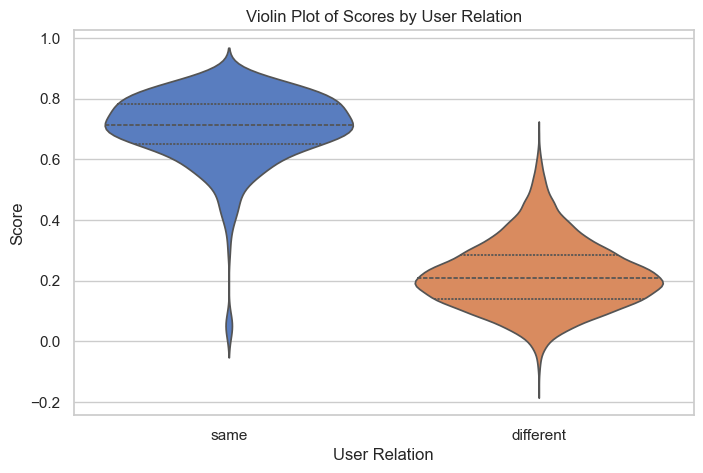

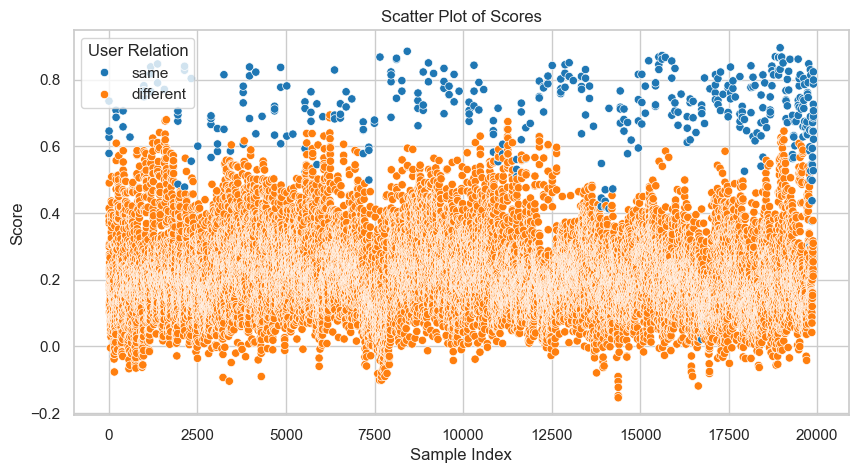

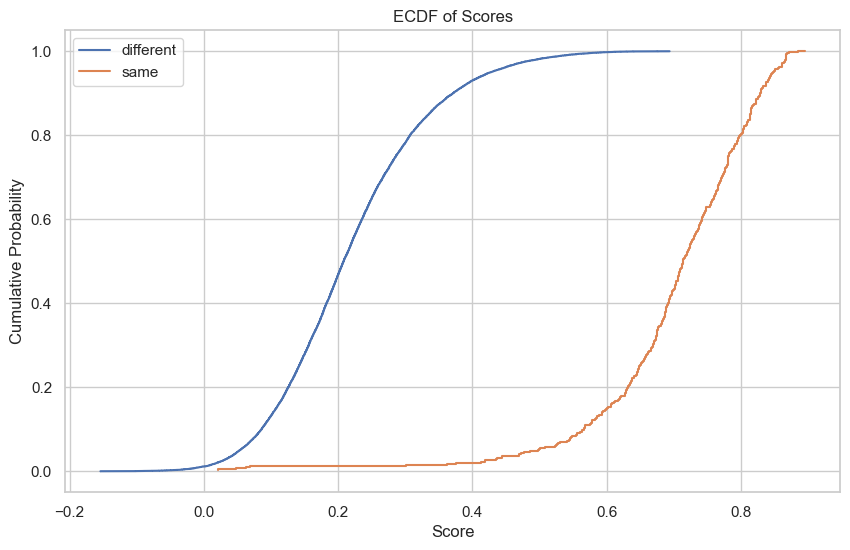

In [2]:
# --- Step 2: Basic statistics
print("\n--- Basic Statistics ---")
print(df.groupby('user_relation')['score'].describe())

# --- Step 3: Plotting
sns.set(style="whitegrid")

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df, x='score', hue='user_relation', kde=True, bins=20, palette='Set2', alpha=0.6)
plt.title('Histogram of Scores by User Relation')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend(title='User Relation')
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='user_relation', y='score', palette='Set3')
plt.title('Boxplot of Scores by User Relation')
plt.xlabel('User Relation')
plt.ylabel('Score')
plt.show()

# KDE (Kernel Density Estimation) plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='score', hue='user_relation', fill=True, common_norm=False, palette="crest", alpha=0.5)
plt.title('Density Plot of Scores')
plt.xlabel('Score')
plt.ylabel('Density')
plt.show()

# Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='user_relation', y='score', palette='muted', inner='quartile')
plt.title('Violin Plot of Scores by User Relation')
plt.xlabel('User Relation')
plt.ylabel('Score')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x=df.index, y='score', hue='user_relation', palette='tab10')
plt.title('Scatter Plot of Scores')
plt.xlabel('Sample Index')
plt.ylabel('Score')
plt.legend(title='User Relation')
plt.show()

# ECDF (Empirical Cumulative Distribution Function)
plt.figure(figsize=(10, 6))
for relation, group in df.groupby('user_relation'):
    sorted_scores = np.sort(group['score'])
    y = np.arange(1, len(sorted_scores)+1) / len(sorted_scores)
    plt.step(sorted_scores, y, label=f'{relation}')
plt.title('ECDF of Scores')
plt.xlabel('Score')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# First, clean the score if not already cleaned (as discussed earlier)

# Separate groups
same_user_df = df[df['user_relation'] == 'same']
different_user_df = df[df['user_relation'] == 'different']

# Function to find outliers
def find_outliers(group):
    Q1 = group['score'].quantile(0.25)
    Q3 = group['score'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = group[(group['score'] < lower_bound) | (group['score'] > upper_bound)]
    return outliers,lower_bound,upper_bound 

# Find outliers
same_user_outliers,lower_bound,upper_bound = find_outliers(same_user_df)
print("\n--- Outliers for Same User ---")
print("lower_bound : ",lower_bound)
print("upper_bound :",upper_bound)
print(same_user_outliers)
different_user_outliers,lower_bound,upper_bound = find_outliers(different_user_df)



print("\n--- Outliers for Different User ---")
print("lower_bound : ",lower_bound)
print("upper_bound :",upper_bound)
print(different_user_outliers)



--- Outliers for Same User ---
lower_bound :  0.454125
upper_bound : 0.978525
         file1    file2   score user_relation
11516   71.wav   73.wav  0.3628          same
13905   91.wav   92.wav  0.4439          same
13906   91.wav   93.wav  0.4192          same
13907   91.wav   94.wav  0.4448          same
14014   92.wav   93.wav  0.4352          same
14015   92.wav   94.wav  0.4190          same
14123   93.wav   95.wav  0.4127          same
16741  121.wav  123.wav  0.0208          same
16819  122.wav  123.wav  0.0692          same
16897  123.wav  124.wav  0.0482          same
16898  123.wav  125.wav  0.0624          same
19798  186.wav  190.wav  0.3008          same
19856  191.wav  193.wav  0.4366          same
19858  191.wav  195.wav  0.3758          same

--- Outliers for Different User ---
lower_bound :  -0.07515000000000002
upper_bound : 0.50285
         file1    file2   score user_relation
79       1.wav   81.wav  0.5088     different
152      1.wav  154.wav -0.0768     differen

In [4]:
import pandas as pd
import numpy as np

# First, define the bins and labels
bins = [-np.inf, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, np.inf]
labels = ['<0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', 
          '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0', '>1']

# Create a new column for score range
df['score_range'] = pd.cut(df['score'], bins=bins, labels=labels, right=True)

# Now group by score_range and user_relation
summary = df.groupby(['score_range', 'user_relation']).size().unstack(fill_value=0)

# Rename columns
summary = summary.rename(columns={'same': 'Same User Count', 'different': 'Different User Count'})

# Display
print(summary)



user_relation  Different User Count  Same User Count
score_range                                         
<0.1                           2575                4
0.1-0.2                        6544                0
0.2-0.3                        6131                0
0.3-0.4                        2889                3
0.4-0.5                        1003               13
0.5-0.6                         314               38
0.6-0.7                          44              114
0.7-0.8                           0              147
0.8-0.9                           0               81
0.9-1.0                           0                0
>1                                0                0


C:\Users\ITinframanage\AppData\Local\Temp\ipykernel_6024\2117231862.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(['score_range', 'user_relation']).size().unstack(fill_value=0)


In [5]:
#while speaking slow
#while speaking with different voice frequencies



# same user score less than 0.1 for those four comparisions
#123.wav is noise no audio collected so score is less than 0.1 when it compared with same speaker
# 16741  121.wav  123.wav  0.0208          same
# 16819  122.wav  123.wav  0.0692          same
# 16897  123.wav  124.wav  0.0482          same
# 16898  123.wav  125.wav  0.0624          same




#score between 0.3 to 0.4 for same speaker for those 3 comparisons
#11516   71.wav   73.wav  0.3628          same (only tvs captured in 73.wav)
#19798  186.wav  190.wav  0.3008          same (different frequencies)
#19858  191.wav  195.wav  0.3758          same  (different frequencies)(191.wav low volume compared to his remaining clips)

#score between 0.4 to 0.5 for same speaker for those 13 comparisons
# 13905   91.wav   92.wav  0.4439          same     0.4-0.5(92.wav user change his voice frequency)
# 14014   92.wav   93.wav  0.4352          same     0.4-0.5(92.wav user change his voice frequency)
# 14015   92.wav   94.wav  0.4190          same     0.4-0.5(92.wav user change his voice frequency)
# 14016   92.wav   95.wav  0.4697          same     0.4-0.5(92.wav user change his voice frequency)
# 13906   91.wav   93.wav  0.4192          same     0.4-0.5(user from 91 to 92 changed his voice frequency )
# 13907   91.wav   94.wav  0.4448          same     0.4-0.5(user from 91 to 92 changed his voice frequency)
# 14123   93.wav   95.wav  0.4127          same     0.4-0.5(user from 91 to 92 changed his voice frequency)
# 14229   94.wav   95.wav  0.4721          same     0.4-0.5(user from 91 to 92 changed his voice frequency)
# 19856  191.wav  193.wav  0.4366          same     0.4-0.5(191.wav low volume compared to his remaining clips)
# 19857  191.wav  194.wav  0.4973          same     0.4-0.5(191.wav low volume compared to his remaining clips)

# 1948    11.wav   15.wav  0.4861          same     0.4-0.5(15.wav hey tvs not captured properly)
# 2136    12.wav   15.wav  0.4776          same     0.4-0.5(15.wav hey tvs not captured properly)
# 7340    42.wav   44.wav  0.4988          same     0.4-0.5






In [6]:
# For same users
same_users = df[df['user_relation'] == 'same']
max_same = same_users['score'].max()
min_same = same_users['score'].min()

# For different users
different_users = df[df['user_relation'] == 'different']
max_diff = different_users['score'].max()
min_diff = different_users['score'].min()

# Print results
print("\n--- Same Users ---")
print(f"Max Score: {max_same}")
print(f"Min Score: {min_same}")

print("\n--- Different Users ---")
print(f"Max Score: {max_diff}")
print(f"Min Score: {min_diff}")



--- Same Users ---
Max Score: 0.8955
Min Score: 0.0208

--- Different Users ---
Max Score: 0.6938
Min Score: -0.1541


In [7]:
# Filter the dataframe
filtered_df = df[(df['score'] >= 0.5) & (df['score'] <= 0.6) & (df['user_relation'] == 'same')]

# Display the result
print(filtered_df)


         file1    file2   score user_relation score_range
1        1.wav    3.wav  0.5787          same     0.5-0.6
2323    13.wav   15.wav  0.5553          same     0.5-0.6
2883    16.wav   20.wav  0.5665          same     0.5-0.6
3065    17.wav   19.wav  0.5844          same     0.5-0.6
3429    19.wav   20.wav  0.5856          same     0.5-0.6
5536    31.wav   33.wav  0.5932          same     0.5-0.6
5538    31.wav   35.wav  0.5224          same     0.5-0.6
5873    33.wav   35.wav  0.5451          same     0.5-0.6
7182    41.wav   44.wav  0.5780          same     0.5-0.6
7339    42.wav   43.wav  0.5973          same     0.5-0.6
7341    42.wav   45.wav  0.5881          same     0.5-0.6
10858   66.wav   70.wav  0.5824          same     0.5-0.6
10990   67.wav   69.wav  0.5538          same     0.5-0.6
10991   67.wav   70.wav  0.5677          same     0.5-0.6
11123   68.wav   70.wav  0.5771          same     0.5-0.6
11515   71.wav   72.wav  0.5309          same     0.5-0.6
11517   71.wav

# New Insights

In [8]:
df.head()

,file1,file2,score,user_relation,score_range
0,1.wav,2.wav,0.7356,same,0.7-0.8
1,1.wav,3.wav,0.5787,same,0.5-0.6
2,1.wav,4.wav,0.6272,same,0.6-0.7
3,1.wav,5.wav,0.6458,same,0.6-0.7
4,1.wav,6.wav,0.3905,different,0.3-0.4


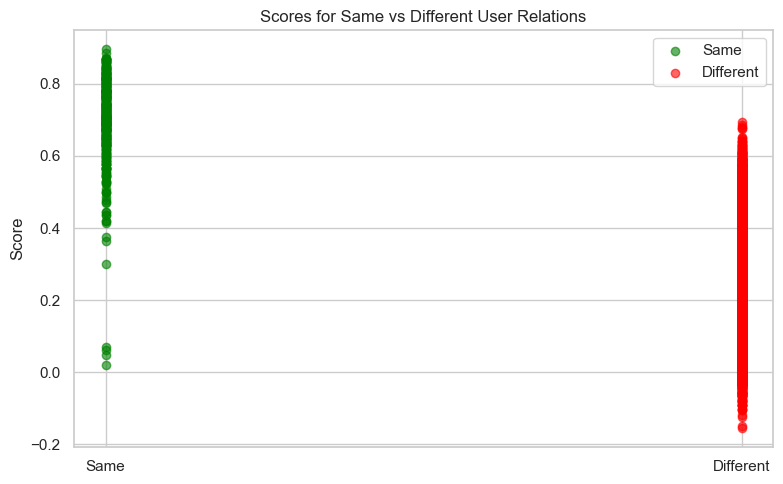

In [9]:
import matplotlib.pyplot as plt
import pandas as pd



# Plotting the scores for "same" vs "different" user_relation
plt.figure(figsize=(8, 5))

# Plot scores for same user_relation
same_scores = df[df['user_relation'] == 'same']['score']
plt.scatter([0] * len(same_scores), same_scores, color='green', label='Same', alpha=0.6)

# Plot scores for different user_relation
different_scores = df[df['user_relation'] == 'different']['score']
plt.scatter([1] * len(different_scores), different_scores, color='red', label='Different', alpha=0.6)

# Adding labels and title
plt.xticks([0, 1], ['Same', 'Different'])
plt.ylabel('Score')
plt.title('Scores for Same vs Different User Relations')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [1]:
from speechbrain.inference.speaker import SpeakerRecognition
verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="pretrained_models/spkrec-ecapa-voxceleb")
score, prediction = verification.verify_files("HeyTVSWakeword/sunamdha/1.wav", "HeyTVSWakeword/sunamdha/3.wav") # Same Speaker
score

c:\Users\ITinframanage\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ITinframanage\AppData\Local\Programs\Python\Python312\Lib\site-packages\speechbrain\utils\parameter_transfer.py:234: UserWarning: Requested Pretrainer collection using symlinks on Windows. This might not work; see `LocalStrategy` documentation. Consider unsetting `collect_in` in Pretrainer to avoid symlinking altogether.
  warnings.warn(


tensor([0.5787])

In [2]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

def remove_silence_pydub(input_file, output_file):
    # Load audio
    audio = AudioSegment.from_wav(input_file)

    # Split on silence
    chunks = split_on_silence(
        audio,
        min_silence_len=1,     # Silence longer than 10ms will be considered a split point
        silence_thresh=audio.dBFS - 16,  # Consider anything 16dB below average as silence
        keep_silence=50          # Keep 50ms silence around each chunk to avoid abrupt cuts
    )

    # Combine chunks into a single audio file
    processed_audio = AudioSegment.empty()
    for chunk in chunks:
        processed_audio += chunk

    # Export result
    processed_audio.export(output_file, format="wav")

# Example usage
remove_silence_pydub("HeyTVSWakeword/sunamdha/1.wav", "cleaned_1.wav")
remove_silence_pydub("HeyTVSWakeword/sunamdha/2.wav", "cleaned_2.wav")


In [3]:
from speechbrain.inference.speaker import SpeakerRecognition
verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="pretrained_models/spkrec-ecapa-voxceleb")
score, prediction = verification.verify_files("cleaned_2.wav", "cleaned_1.wav") # Same Speaker
score

tensor([0.5766])

In [4]:
print(score)

tensor([0.5766])


In [17]:
filtered_df = df[(df['score'] >= 0.5) & (df['score'] <= 0.6) & (df['user_relation'] == 'different')]

# Display the result
print(filtered_df)


         file1    file2   score user_relation score_range
79       1.wav   81.wav  0.5088     different     0.5-0.6
203      2.wav    7.wav  0.5096     different     0.5-0.6
204      2.wav    8.wav  0.5000     different     0.4-0.5
205      2.wav    9.wav  0.5574     different     0.5-0.6
262      2.wav   66.wav  0.5133     different     0.5-0.6
...        ...      ...     ...           ...         ...
19598  175.wav  199.wav  0.5410     different     0.5-0.6
19599  175.wav  200.wav  0.5887     different     0.5-0.6
19741  182.wav  195.wav  0.5381     different     0.5-0.6
19781  185.wav  187.wav  0.5164     different     0.5-0.6
19782  185.wav  188.wav  0.5284     different     0.5-0.6

[315 rows x 5 columns]


In [19]:
remove_silence_pydub("HeyTVSWakeword/sunamdha/1.wav", "cleaned_1.wav")
remove_silence_pydub("HeyTVSWakeword/sunamdha/81.wav", "cleaned_81.wav")

In [21]:
from speechbrain.inference.speaker import SpeakerRecognition
verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="pretrained_models/spkrec-ecapa-voxceleb")
score, prediction = verification.verify_files("cleaned_81.wav", "cleaned_1.wav") # Same Speaker
score

tensor([0.3930])